In [1]:
import scipy
from scipy import *
import matplotlib.pyplot as plt
from matplotlib import *
from __future__ import division
#import scikit.audiolab as audio
import numpy as np
%matplotlib inline

# Graphing helper function
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

---

# Sampling a test function

Wave with:

* Frequency of 1 Hz
* Amplitude of 5

We will sample:

* At 10 samples per second
* For 3 seconds
* So a total of 30 samples

In [2]:
sample_rate = 10 # samples per sec
total_sampling_time = 3
num_samples = sample_rate * total_sampling_time

t = linspace(0, total_sampling_time, num_samples)

# between x = 0 and x = 1, a complete revolution (2 pi) has been made, so this is
# a 1 Hz signal with an amplitude of 5
frequency_in_hz = 1
wave_amplitude = 5
f = lambda x: wave_amplitude * sin(frequency_in_hz * 2*pi*x)
    
sampled_f = [f(i) for i in t]


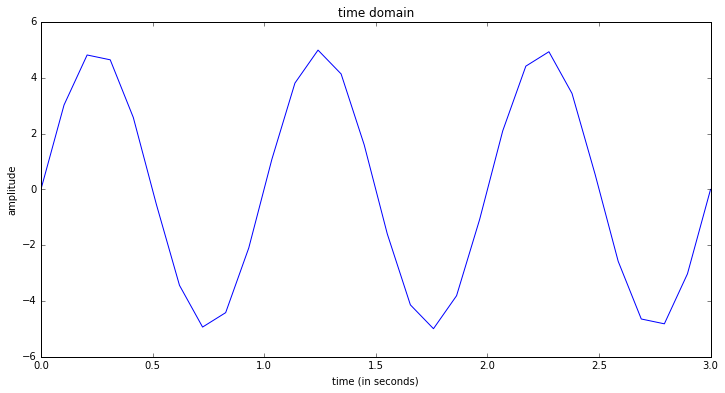

In [4]:
setup_graph(title='time domain', x_label='time (in seconds)', y_label='amplitude', fig_size=(12,6))
_ = plt.plot(t, sampled_f)

# Take the fft

In [5]:
fft_output = numpy.fft.fft(sampled_f)

//anaconda/lib/python2.7/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


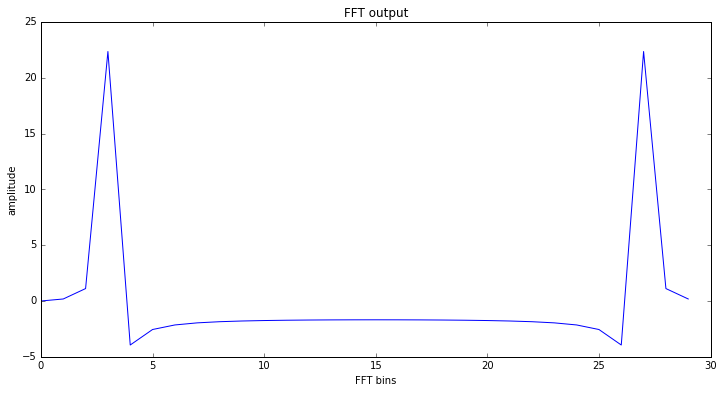

In [6]:
setup_graph(title='FFT output', x_label='FFT bins', y_label='amplitude', fig_size=(12,6))
_ = plt.plot(fft_output)

# Why is it symmetric?

* Because it is a complex-input fourier transform, and for real input, the 2nd half will always be a mirror image.
* For real-valued input, the fft output is always symmetric.
* Since we are only dealing with real input, let's just use a real-input version of the fft.

In [7]:
rfft_output = numpy.fft.rfft(sampled_f)

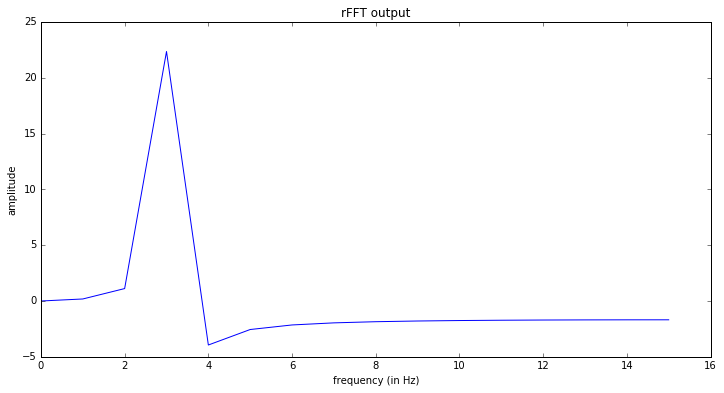

In [8]:
setup_graph(title='rFFT output', x_label='frequency (in Hz)', y_label='amplitude', fig_size=(12,6))
_ = plt.plot(rfft_output)

# Get the x-axis labels correct

## We want the x-axis to represent frequency

In our DFT equation $$G(\frac{n}{N}) = \sum_{k=0}^{N-1} g(k) e^{-i 2 \pi k \frac{n}{N} }$$

* $G(\frac{n}{N})$ means the DFT output for the frequency which goes through $\frac{n}{N}$ cycles per sample.
* And we take frequencies from 0 to (the total number of samples divided by 2)

In [11]:
# Getting frequencies on x-axis right
rfreqs = [(i*1.0/num_samples)*sample_rate for i in range(int(num_samples/2+1))]

### Frequencies range from 0 to the Nyquist Frequency (sample rate / 2)

In [12]:
# So you can see, our frequencies go from 0 to 5Hz.  5 is half of the sample rate,
# which is what it should be (Nyquist Frequency).
rfreqs

[0.0,
 0.3333333333333333,
 0.6666666666666666,
 1.0,
 1.3333333333333333,
 1.6666666666666665,
 2.0,
 2.3333333333333335,
 2.6666666666666665,
 3.0,
 3.333333333333333,
 3.6666666666666665,
 4.0,
 4.333333333333334,
 4.666666666666667,
 5.0]

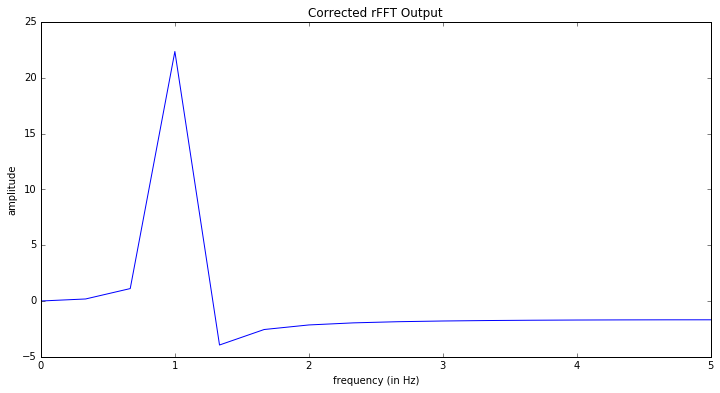

In [13]:
setup_graph(title='Corrected rFFT Output', x_label='frequency (in Hz)', y_label='amplitude', fig_size=(12,6))
_ = plt.plot(rfreqs, rfft_output)

# Getting y-axis labels correct

## We want the y-axis to represent magnitude

We are actually getting negative values, and it looks like our amplitude is way larger than what it should be (which is 5).

The magnitude of each component is:

$$magnitude(i) = \frac{\sqrt{i.real^2 + i.imag^2}}{N}$$

In [14]:
rfft_mag = [sqrt(i.real**2 + i.imag**2)/len(rfft_output) for i in rfft_output]

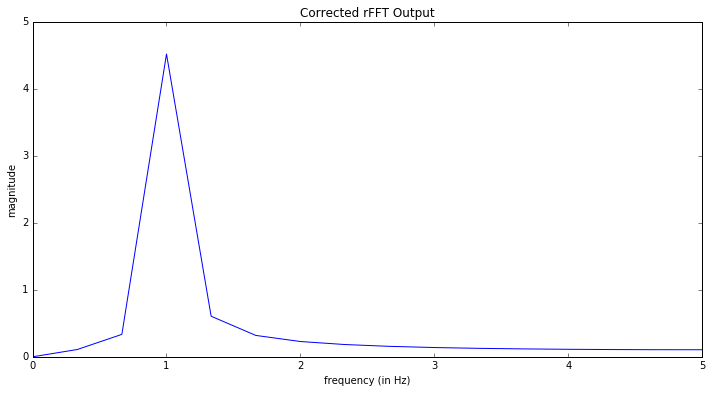

In [15]:
setup_graph(title='Corrected rFFT Output', x_label='frequency (in Hz)', y_label='magnitude', fig_size=(12,6))
_ = plt.plot(rfreqs, rfft_mag)

# Inverse FFT

We can take the output of the FFT and perform an Inverse FFT to get back to our original wave (using the Inverse Real FFT - irfft).

In [16]:
irfft_output = numpy.fft.irfft(rfft_output)

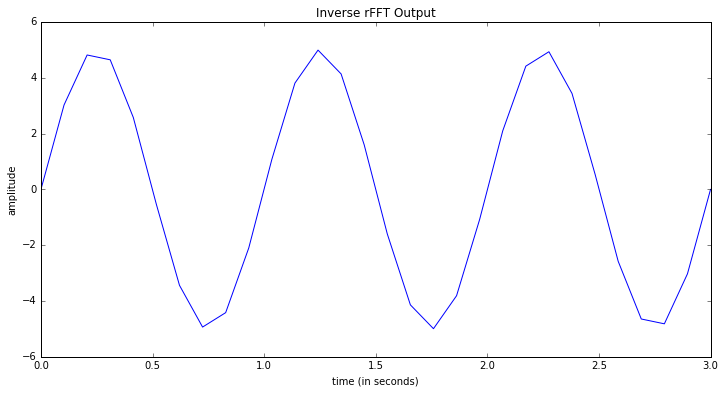

In [17]:
setup_graph(title='Inverse rFFT Output', x_label='time (in seconds)', y_label='amplitude', fig_size=(12,6))
_ = plt.plot(t, irfft_output)